In [167]:
%config IPCompleter.greedy=True

## 1. Importing libraries

In [168]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

### 1.1 Importing dataset

In [169]:
emotions = pd.read_csv("emotions.csv")

### 1.2 Simple EDA

In [170]:
print("Shape of dataset: {}".format(emotions.shape))
emotions.head(5)

Shape of dataset: (593, 78)


,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,0,0,0,1,0,0


#### 1.2.1 Checking for missing values

In [171]:
pd.set_option('display.max_rows', 5)     #set max options to ensure all the rows are displayed
missing_data = emotions.isnull().sum()
print(missing_data)                       #no missing data is found

Mean_Acc1298_Mean_Mem40_Centroid    0
 Mean_Acc1298_Mean_Mem40_Rolloff    0
                                   ..
 sad-lonely                         0
 angry-aggresive                    0
Length: 78, dtype: int64


#### 1.2.2 Checking number of observations under each label

In [172]:
# Extracting the target labels
target_labels = list(emotions.columns.values)
target_labels = target_labels[-6:]
print(target_labels)

[' amazed-suprised', ' happy-pleased', ' relaxing-calm', ' quiet-still', ' sad-lonely', ' angry-aggresive']


In [173]:
# number of observations under each category
pd.set_option('display.max_rows', 6)
total_num = []
for target_label in target_labels:
    total_num.append((target_label, emotions[target_label].sum()))
num_observations = pd.DataFrame(total_num, columns=['Target Labels', 'Number of observations'])
num_observations

,Target Labels,Number of observations
0,amazed-suprised,173
1,happy-pleased,166
2,relaxing-calm,264
3,quiet-still,148
4,sad-lonely,168
5,angry-aggresive,189


##### 1.2.2.1 Plotting the result

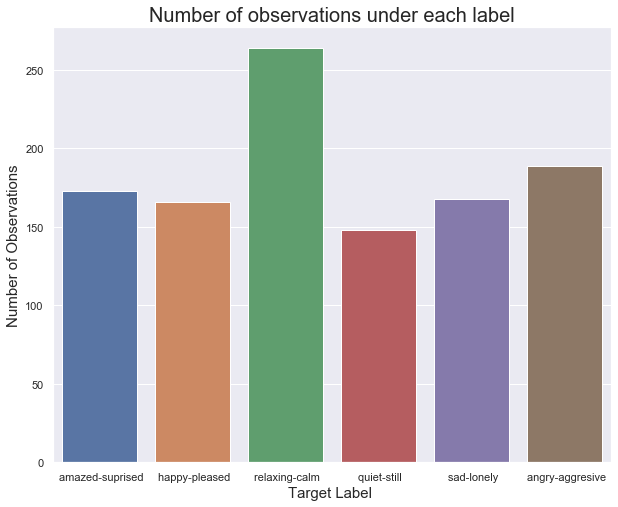

In [174]:
seaborn.set(font_scale = 1)
plt.figure(figsize=(10,8))

seaborn.barplot(target_labels, num_observations["Number of observations"])

plt.title("Number of observations under each label", fontsize=20)
plt.ylabel('Number of Observations',fontsize = 15)
plt.xlabel('Target Label ',fontsize = 15)


plt.show()

#### 1.2.3 Checking for Observations with more than 1 label

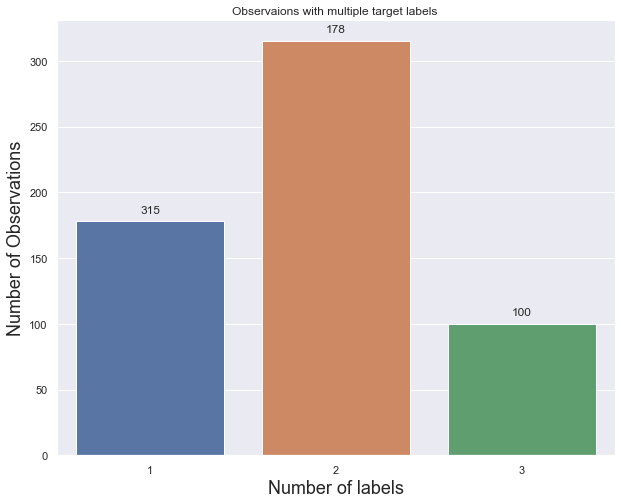

In [175]:
# emotions.iloc[:,-6:].sum().values
seaborn.set(font_scale = 1)
plt.figure(figsize=(10,8))

rowSums = emotions.iloc[:,-6:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[0:]



ax = seaborn.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Observaions with multiple target labels ")
plt.ylabel('Number of Observations', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')


plt.show()


Based on the plot, 315 observations are assigned 1 label, 178 labels are assigned 2 labels and 100 labels are assigned 3 labels.

### 1.3 Data preprocessing

#### 1.3.1 Feature scaling

In [176]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
emotions_scaled = scaler.fit(emotions)
emotions.head(5)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2,0.195196,0.310801,0.683817,0,0,0,1,0,0


## 1.4 Train-Test split 

In [177]:
#splitting the full dataset into 8:2 ratio for train/test
from sklearn.model_selection import train_test_split
train, test = train_test_split(emotions, random_state=42, test_size=0.20, shuffle=True)

print("Shape of training data: {}".format(train.shape))
print("Shape of test data: {}".format(test.shape))

Shape of training data: (474, 78)
Shape of test data: (119, 78)


In [178]:
x_train = train.iloc[:,0:72]
y_train = train.iloc[:,-6:]
x_train.head(5)

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
245,0.117655,0.286092,0.088968,-69.529933,2.777860,1.108064,2.133964,0.360749,0.875407,0.612881,...,0.122614,0.119617,0.081191,64,0.119623,192,3,0.115659,0.023445,0.379782
271,0.069188,0.141212,0.080482,-81.890632,5.922588,0.059111,1.733528,0.387359,0.703545,0.276511,...,0.123219,0.108024,0.065947,78,0.129751,156,2,0.400041,0.192604,1.029436
109,0.101962,0.342790,0.096588,-73.150654,3.676109,0.719896,0.289061,1.209981,0.821483,0.711324,...,0.126250,0.075780,0.691220,66,0.328074,132,2,1.105126,0.585160,2.051738
483,0.133546,0.278666,0.079672,-64.782736,3.172590,-0.554715,1.697949,0.108555,0.140307,0.352108,...,0.069985,0.064023,0.115284,90,0.168984,180,2,0.332409,0.309501,1.206182
310,0.044367,0.087682,0.078756,-68.171616,6.620781,0.805423,1.790270,0.602356,0.697882,0.286901,...,0.079753,0.095386,0.039269,70,0.004367,140,2,0.194203,0.267375,0.488107


In [179]:
y_train.head(5)

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
245,1,0,0,0,0,1
271,0,1,1,0,0,0
109,1,0,0,0,0,0
483,1,0,0,0,0,1
310,0,0,1,1,1,0


In [180]:
x_test = test.iloc[:,0:72]
y_test = test.iloc[:,-6:]
x_test.head(5)
print()
y_test = y_test.to_numpy()
print(y_test[:5])


[[0 0 0 0 0 1]
 [0 1 1 0 0 0]
 [1 0 0 0 0 1]
 [0 1 1 0 0 0]
 [1 0 0 0 0 0]]


## 2. Multilabel Classification

### 2.1 One vs Rest classifier

In [181]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [182]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
models = []
                          
for target_label in target_labels:
    clf = OneVsRestClassifier(LogisticRegression(solver='liblinear'))
    print('Processing emotions assigned to: {} ...'.format(target_label))
    
    # Training logistic regression model on train data
    model = clf.fit(x_train, train[target_label])
    models.append(model)
    
    # calculating test accuracy
    prediction = model.predict(x_test)
    print('Test accuracy: {}'.format(accuracy_score(test[target_label], prediction)))
    print("\n")

Processing emotions assigned to:  amazed-suprised ...
Test accuracy: 0.7815126050420168


Processing emotions assigned to:  happy-pleased ...
Test accuracy: 0.6722689075630253


Processing emotions assigned to:  relaxing-calm ...
Test accuracy: 0.7478991596638656


Processing emotions assigned to:  quiet-still ...
Test accuracy: 0.9243697478991597


Processing emotions assigned to:  sad-lonely ...
Test accuracy: 0.8403361344537815


Processing emotions assigned to:  angry-aggresive ...
Test accuracy: 0.7983193277310925


Wall time: 99.1 ms


In [183]:
#testing for all emotions
predictions = []
for model in models:
    pred = model.predict(x_test)
    predictions.append(pred)
    
predictions = np.array(predictions).T

In [184]:
#Calculate score
exact_match_score = np.all(predictions == y_test, axis=1).mean()
hamming_score = (predictions == y_test).mean()
print('Exact match score (Whole row must match):', exact_match_score)
print('Hamming score (Individual label predictions):', hamming_score)

Exact match score (Whole row must match): 0.31932773109243695
Hamming score (Individual label predictions): 0.7941176470588235
